In [14]:
from game.game import *
from memorymontecarlo.memcts import Memcts
from minmax.minimax import *
from montecarlo.uct import uct
def play_one(k,silent=True):
    LARGO = 4
    TABLERO_ALTO = 6
    TABLERO_ANCHO = 7
    t = Connect4(TABLERO_ANCHO, TABLERO_ALTO, LARGO)

    agente = MiniMax(t,4)
    agentemmc = Memcts(t)
    p = 0
    while not t.end:            
        if  p == 0:
            t2 = agentemmc.uct(k, plot=False,silent=silent)[1]
        else:        
            t2 = agente.best_move(silent=silent)
            
        p=(p+1)%2
        agentemmc.move(t2)
        t.move(t2)
    t.show()
    return t.winner

In [15]:
play_one(3000,False)

0 (-0.11,-8,72), 1 (0.07,12,182), 2 (0.14,44,321), 3 (0.28,595,2130), 4 (0.03,4,144), 5 (-0.03,-3,108), 6 (-0.26,-11,43)

4 0.5, 5 0.5, 6 0.5, 0 0.5, 3 0.5, 1 0.5, 2 0.5, 
0 (0.14,16,116), 1 (0.27,70,264), 2 (0.22,43,193), 3 (0.42,725,1723), 4 (0.27,70,262), 5 (0.32,131,413), 6 (0.15,18,120)

4 0.5, 3 0.5, 6 0.5, 5 0.5, 0 0.5, 1 0.5, 2 0.5, 
0 (0.32,207,654), 1 (0.33,250,760), 2 (0.28,120,430), 3 (0.31,147,479), 4 (0.06,6,97), 5 (0.35,369,1053), 6 (0.19,37,198)

5 0.5, 4 0.5, 6 0.5, 3 0.5, 0 0.5, 1 0.5, 2 0.5, 
0 (0.24,73,308), 1 (0.15,25,164), 2 (0.34,306,905), 3 (0.31,206,663), 4 (0.03,3,90), 5 (0.31,198,643), 6 (0.25,86,343)

4 -0.9999, 2 0.5, 5 0.5, 1 0.5, 6 0.5, 0 0.5, 3 0.5, 
0 (0.45,490,1087), 1 (0.33,92,278), 2 (0.38,172,450), 3 (0.35,121,343), 4 (-0.25,-6,24), 5 (0.42,273,655), 6 (0.29,61,207)

2 0.5, 4 -0.9999, 5 0.5, 1 -0.9999, 6 0.5, 0 0.5, 3 0.5, 
0 (0.51,247,482), 1 (0.49,184,378), 2 (0.49,194,396), 3 (0.55,421,767), 4 (0.33,41,125), 5 (0.52,272,524), 6 (0.5,208,418)

4 -

1

In [21]:
dc = {'x':[],'y':[]}
for n in [30,35,40,45,50,60,70,75,80,90,100,200,500,1000,2000]:
    cnt = 0
    for i in range(30):
        print(i,end=", ")
        k = play_one(n)
        if k==1:
            cnt+=1
    dc['x'].append(n)
    dc['y'].append(cnt)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3

In [24]:
a = {}
a['x']=dc['x']
a['y']=dc['y']

In [28]:
pd.DataFrame(a).to_csv('aumentar_iteraciones.csv',index=False)

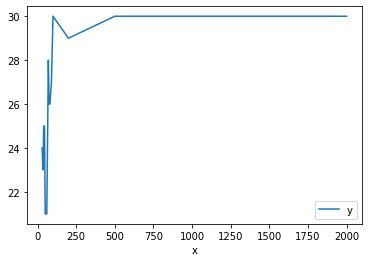

In [29]:
import pandas as pd

pd.DataFrame(a).plot(x='x',y='y')